# Ahmed Abd-Elsalam Muhammed Afify

## Optimization Labs And HomeWorks:


In [1]:
# Importing Required Libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# 1) Loading the data:
arr = np.genfromtxt('Insurance_in_Sweden.csv', delimiter=',', skip_header=True)
x = arr[:,0].reshape(-1,1)
y = arr[:,1].reshape(-1,1)

In [41]:
print(x[:10].T)
print(y[:10].T)

[[108.  19.  13. 124.  40.  57.  23.  14.  45.  10.]]
[[392.5  46.2  15.7 422.2 119.4 170.9  56.9  77.5 214.   65.3]]


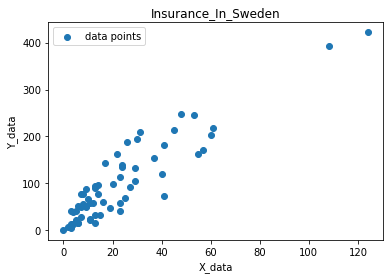

In [42]:
# plotting data points:
plt.scatter(x, y, label='data points')
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.title('Insurance_In_Sweden')
plt.legend()
plt.show()

___
## AdaGrad :

In [174]:
# 2) Implementing the Momentum_Based GD:

# initialize the parameters:
m = len(x)
Xs = np.concatenate((np.ones((m,1)), x), axis=1)
thetas = np.ones((Xs.shape[1],1))
yhat = np.zeros((m,1))

# Hyper_parameters:
alpha = 0.2
vt = np.ones((Xs.shape[1],1))
epslon = 10**(-8)
epoches = 200

# Lists to store values of epoches:
loss_lst = []
theta_0 = []
theta_1 = []
yhat_lst = []

# Implementing Iterations:
for i in range(epoches):
    yhat = Xs@ thetas
    error = yhat - y
    J_loss = (1/(2*m)) * np.sum(error**2)
    grd = (1/m) * (Xs.T @ error).reshape(-1,1)
    vt = vt + (grd)**2
    thetas = thetas - (alpha/((np.sqrt(vt)+epslon)))*grd

    loss_lst.append(J_loss)
    theta_0.append(thetas[0])
    theta_1.append(thetas[1])
    yhat_lst.append(yhat)

In [175]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [4.34597069]
theta_1 = [3.70187205]


In [176]:
# calculating the final Hypothesis based on final theta values:
yhat = (Xs @ thetas)

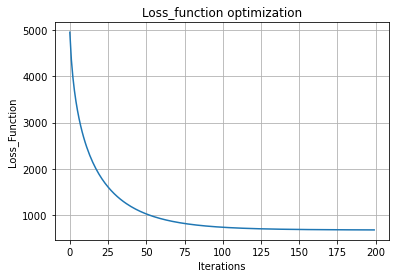

In [177]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

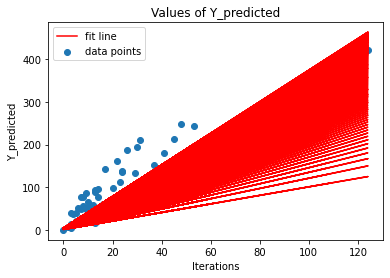

In [178]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(epoches-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

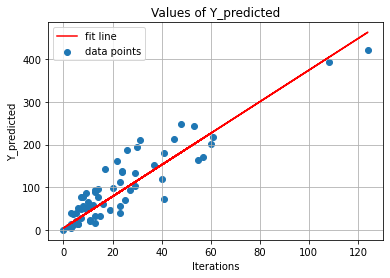

In [179]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

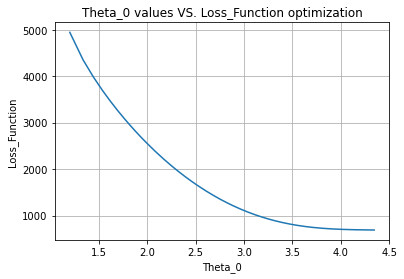

In [180]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

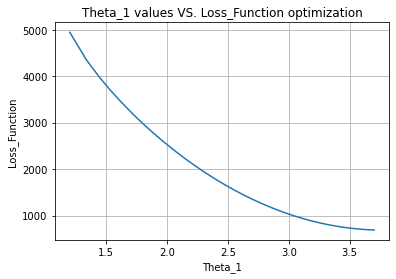

In [181]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [182]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.8164986752196572


___
## RMSProp:

In [192]:
# 2) Implementing the Nestrove_Accelerated GD:

# initialize the parameters:
m = len(x)
Xs = np.concatenate((np.ones((m,1)), x), axis=1)
thetas = np.ones((Xs.shape[1],1))
yhat = np.zeros((m,1))

# Hyper_parameters:
alpha = 0.1
vt = np.ones((Xs.shape[1],1))
epslon = 10**(-8)
beta = 0.8
epoches = 200

# Lists to store values of epoches:
loss_lst = []
theta_0 = []
theta_1 = []
yhat_lst = []

# Implementing Iterations:
for i in range(epoches):
    yhat = Xs@ thetas
    error = yhat - y
    J_loss = (1/(2*m)) * np.sum(error**2)
        
    grd = (1/m) * (Xs.T @ error).reshape(-1,1)
    vt = beta*vt + (1-beta)*(grd)**2
    thetas = thetas - (alpha/((np.sqrt(vt)+epslon)))*grd


    loss_lst.append(J_loss)
    theta_0.append(thetas[0])
    theta_1.append(thetas[1])
    yhat_lst.append(yhat)

In [193]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [18.30437429]
theta_1 = [3.50179072]


In [194]:
# calculating the final Hypothesis based on final theta values:
yhat = (Xs @ thetas)

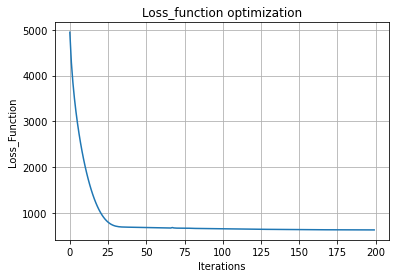

In [195]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

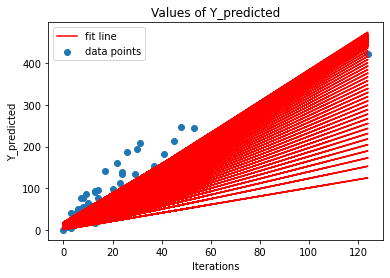

In [196]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(epoches-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

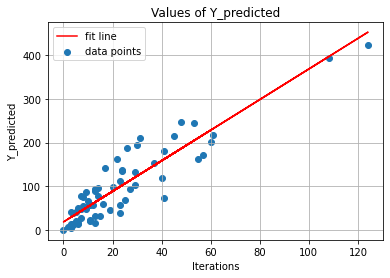

In [197]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

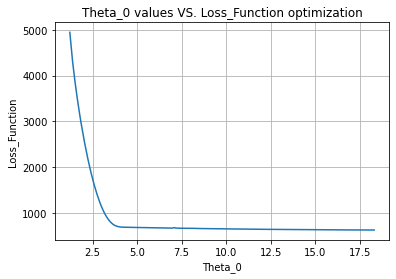

In [198]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

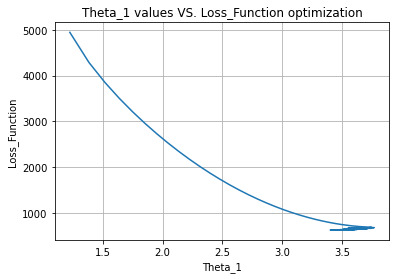

In [199]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [200]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.8327792886478259


___
## Adam:

In [156]:
# 2) Implementing the Nestrove_Accelerated GD:

# initialize the parameters:
m = len(x)
Xs = np.concatenate((np.ones((m,1)), x), axis=1)
thetas = np.ones((Xs.shape[1],1))
yhat = np.zeros((m,1))

# Hyper_parameters:
alpha = 0.1
mt = np.ones((Xs.shape[1],1))
vt = np.ones((Xs.shape[1],1))
beta1 = 0.8
beta2 = 0.9
epslon = 10**(-8)
epoches = 200

# Lists to store values of epoches:
loss_lst = []
theta_0 = []
theta_1 = []
yhat_lst = []

# Implementing Iterations:
for i in range(epoches):
    yhat = Xs @ thetas
    error = yhat - y
    J_loss = (1/(2*m)) * np.sum(error**2)
        
    grd = (1/m) * (Xs.T @ error).reshape(-1,1)
    mt = beta1*mt + (1-beta1)*grd
    vt = beta2*vt + (1-beta2)*(grd)**2
    
    mt = mt / (1- (beta1**(i+1)))
    vt = vt / (1- (beta2**(i+1)))
    
    thetas = thetas - (alpha/((np.sqrt(vt)+epslon)))*mt

    loss_lst.append(J_loss)
    theta_0.append(thetas[0])
    theta_1.append(thetas[1])
    yhat_lst.append(yhat)

In [157]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [9.07409651]
theta_1 = [3.65008039]


In [158]:
# calculating the final Hypothesis based on final theta values:
yhat = (Xs @ thetas)

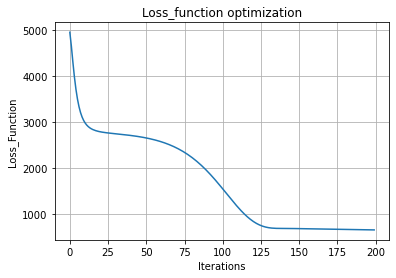

In [159]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

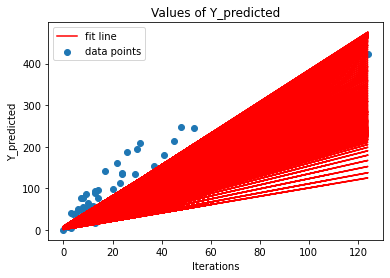

In [160]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(epoches-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

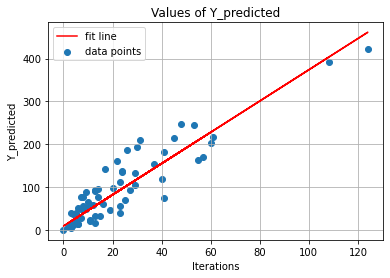

In [161]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

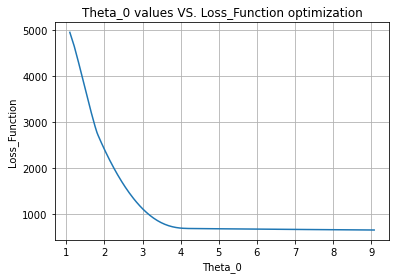

In [162]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

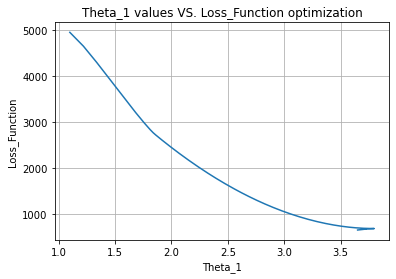

In [163]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [164]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.8253115960897995
